In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Linear Regression/DATA/gene_expression.csv')
df.head(5)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

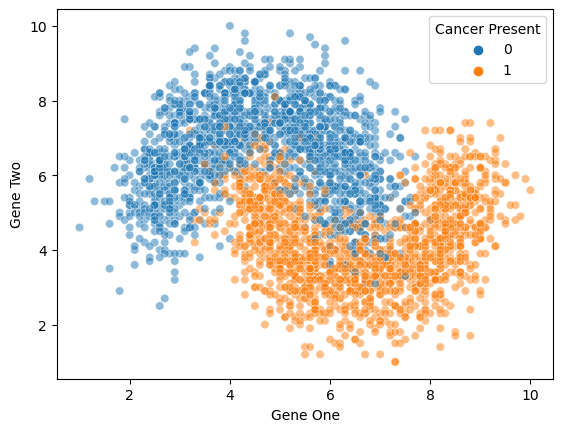

In [4]:
sns.scatterplot(x='Gene One' , y = 'Gene Two' , data=df , hue = 'Cancer Present',alpha = 0.5)

C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

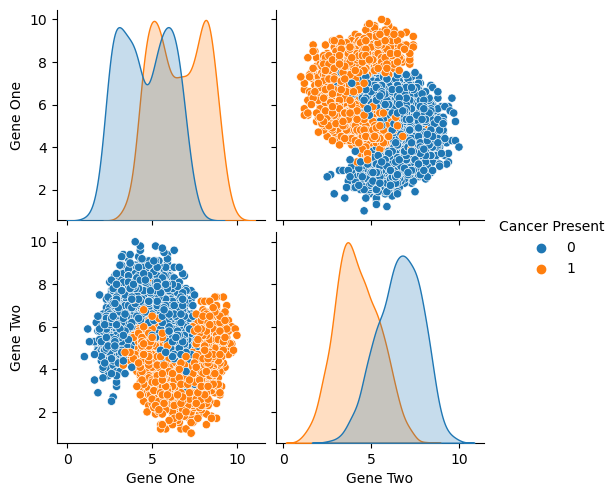

In [5]:
sns.pairplot(data=df , hue='Cancer Present')

In [6]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Cancer Present' , axis=1)
y = df['Cancer Present']
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [11]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_test  ,y_pred)

array([[421,  41],
       [ 43, 485]], dtype=int64)

In [12]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       462
           1       0.92      0.92      0.92       528

    accuracy                           0.92       990
   macro avg       0.91      0.91      0.91       990
weighted avg       0.92      0.92      0.92       990



In [17]:
# Elbow method 
from sklearn.metrics import accuracy_score
test_results = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train , y_train)
    y_pred_test = knn_model.predict(x_test)
    test_error = 1- accuracy_score(y_test , y_pred_test)
    test_results.append(test_error)

test_results


[0.08484848484848484,
 0.09292929292929297,
 0.07474747474747478,
 0.07474747474747478,
 0.06464646464646462,
 0.06464646464646462,
 0.06464646464646462,
 0.05959595959595965,
 0.06464646464646462,
 0.06464646464646462,
 0.06666666666666665,
 0.06565656565656564,
 0.06565656565656564,
 0.06262626262626259,
 0.06666666666666665,
 0.06161616161616157,
 0.06262626262626259,
 0.06262626262626259,
 0.06161616161616157,
 0.06464646464646462,
 0.06464646464646462,
 0.06666666666666665,
 0.06262626262626259,
 0.05858585858585863,
 0.06161616161616157,
 0.06161616161616157,
 0.06161616161616157,
 0.06060606060606055,
 0.06161616161616157]

Text(0.5, 0, 'Knn Neighbors')

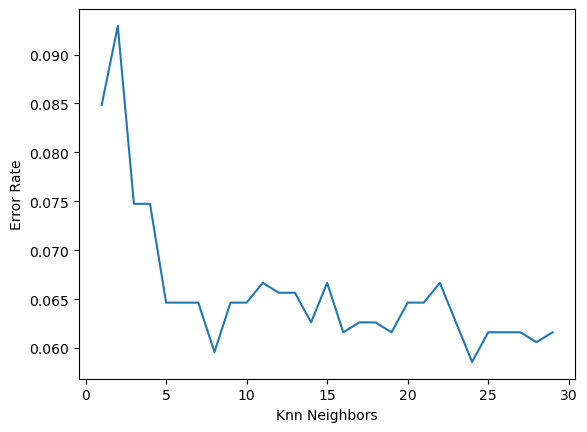

In [16]:
plt.plot(range(1,30) , test_results)
plt.ylabel('Error Rate')
plt.xlabel('Knn Neighbors')

In [20]:
# Now Pipeline method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
X = df.drop('Cancer Present' , axis=1)
y = df['Cancer Present']
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=101)
knn = KNeighborsClassifier()
operations = [('scaler' , scaler) , ('knn' , knn)]

In [21]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors':k_values}
full_cv_classifier = GridSearchCV(pipe, param_grid , cv=5 , scoring='accuracy')
full_cv_classifier.fit(x_train , y_train)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [22]:
test_pred = full_cv_classifier.predict(x_test)
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       462
           1       0.94      0.94      0.94       528

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990

